## Explore TED Talks

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_colwidth', -1)

Got this dataset from Kaggle and blow are all the features availalbe in the dataset:
- name: The official name of the TED Talk. Includes the title and the speaker.
- title: The title of the talk
- description: A blurb of what the talk is about.
- main_speaker: The first named speaker of the talk.
- speaker_occupation: The occupation of the main speaker.
- num_speaker: The number of speakers in the talk.
- duration: The duration of the talk in seconds.
- event: The TED/TEDx event where the talk took place.
- film_date: The Unix timestamp of the filming.
- published_date: The Unix timestamp for the publication of the talk on TED.com
- comments: The number of first level comments made on the talk.
- tags: The themes associated with the talk.
- languages: The number of languages in which the talk is available.
- ratings: A stringified dictionary of the various ratings given to the talk (inspiring, fascinating, jaw dropping, etc.)
- related_talks: A list of dictionaries of recommended talks to watch next.
- url: The URL of the talk.
- views: The number of views on the talk.

In [24]:
ted = pd.read_csv("ted_main.csv")
ted.head(3)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292


In [25]:
ted.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views'],
      dtype='object')

### Data Preprocessing

In [26]:
# change film date and published date to readable format
import datetime

def dt_parser(timestamp):
    formated_date = datetime.datetime.fromtimestamp(int(timestamp)).strftime('%m-%d-%Y')
    return formated_date

ted['film_date'] = ted['film_date'].apply(dt_parser)
ted['published_date'] = ted['published_date'].apply(dt_parser)

In [29]:
# Check NAs
pd.isnull(ted).sum()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    0
tags                  0
title                 0
url                   0
views                 0
dtype: int64

In [28]:
# Fill in Unkown for missing speaker_occupation
ted['speaker_occupation'].fillna("Unknown", inplace = True)

## Most popular talks

First, let's look at the distribution of views of the talks. Most talks have vies less than 1e7.

In [42]:
ted["views"].describe()

count    2.550000e+03
mean     1.698297e+06
std      2.498479e+06
min      5.044300e+04
25%      7.557928e+05
50%      1.124524e+06
75%      1.700760e+06
max      4.722711e+07
Name: views, dtype: float64

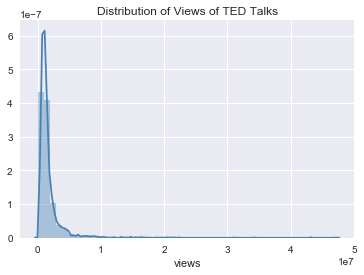

In [38]:
sns.set(style="darkgrid")
ax = sns.distplot(ted["views"],kde=True, color="steelblue") 
plt.title("Distribution of Views of TED Talks")

Let's zoom in at the highly densed region.

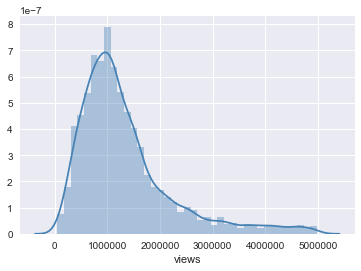

In [40]:
ax = sns.distplot(ted[ted["views"]<0.5e7]['views'],kde=True, color="steelblue") 

#### Ten Most Popular Talks - by view

In [51]:
top10_view = ted[['name','views']].sort_values('views', ascending=False)[:10]
top10_view

,name,views
0,Ken Robinson: Do schools kill creativity?,47227110
1346,Amy Cuddy: Your body language may shape who you are,43155405
677,Simon Sinek: How great leaders inspire action,34309432
837,Brené Brown: The power of vulnerability,31168150
452,Mary Roach: 10 things you didn't know about orgasm,22270883
1776,Julian Treasure: How to speak so that people want to listen,21594632
201,Jill Bolte Taylor: My stroke of insight,21190883
5,Tony Robbins: Why we do what we do,20685401
2114,James Veitch: This is what happens when you reply to spam email,20475972
1416,"Cameron Russell: Looks aren't everything. Believe me, I'm a model.",19787465


#### Top 10 talks with most discussion

In [53]:
top10_comment = ted[['name','comments']].sort_values('comments', ascending=False)[:10]
top10_comment

,name,comments
96,Richard Dawkins: Militant atheism,6404
0,Ken Robinson: Do schools kill creativity?,4553
644,Sam Harris: Science can answer moral questions,3356
201,Jill Bolte Taylor: My stroke of insight,2877
1787,David Chalmers: How do you explain consciousness?,2673
954,Janet Echelman: Taking imagination seriously,2492
840,Lesley Hazleton: On reading the Koran,2374
1346,Amy Cuddy: Your body language may shape who you are,2290
661,Michael Specter: The danger of science denial,2272
677,Simon Sinek: How great leaders inspire action,1930


### Expore the most popular topics in Ted Talks

In [62]:
import ast
ted['tags'] = ted['tags'].apply(lambda x: ast.literal_eval(x))
s = ted.apply(lambda x: pd.Series(x['tags']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'theme'

In [65]:
theme_df = ted.drop('tags', axis=1).join(s)
theme_df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,title,url,views,theme
0,4553,Sir Ken Robinson makes an entertaining and profoundly moving case for creating an education system that nurtures (rather than undermines) creativity.,1164,TED2006,02-24-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,06-26-2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]","[{'id': 865, 'hero': 'https://pe.tedcdn.com/images/ted/172559_800x600.jpg', 'speaker': 'Ken Robinson', 'title': 'Bring on the learning revolution!', 'duration': 1008, 'slug': 'sir_ken_robinson_bring_on_the_revolution', 'viewed_count': 7266103}, {'id': 1738, 'hero': 'https://pe.tedcdn.com/images/ted/de98b161ad1434910ff4b56c89de71af04b8b873_1600x1200.jpg', 'speaker': 'Ken Robinson', 'title': ""How to escape education's death valley"", 'duration': 1151, 'slug': 'ken_robinson_how_to_escape_education_s_death_valley', 'viewed_count': 6657572}, {'id': 2276, 'hero': 'https://pe.tedcdn.com/images/ted/3821f3728e0b755c7b9aea2e69cc093eca41abe1_2880x1620.jpg', 'speaker': 'Linda Cliatt-Wayman', 'title': 'How to fix a broken school? Lead fearlessly, love hard', 'duration': 1027, 'slug': 'linda_cliatt_wayman_how_to_fix_a_broken_school_lead_fearlessly_love_hard', 'viewed_count': 1617101}, {'id': 892, 'hero': 'https://pe.tedcdn.com/images/ted/e79958940573cc610ccb583619a54866c41ef303_2880x1620.jpg', 'speaker': 'Charles Leadbeater', 'title': 'Education innovation in the slums', 'duration': 1138, 'slug': 'charles_leadbeater_on_education', 'viewed_count': 772296}, {'id': 1232, 'hero': 'https://pe.tedcdn.com/images/ted/0e3e4e92d5ee8ae0e43962d447d3f790b31099b8_800x600.jpg', 'speaker': 'Geoff Mulgan', 'title': 'A short intro to the Studio School', 'duration': 376, 'slug': 'geoff_mulgan_a_short_intro_to_the_studio_school', 'viewed_count': 667971}, {'id': 2616, 'hero': 'https://pe.tedcdn.com/images/ted/71cde5a6fa6c717488fb55eff9eef939a9241761_2880x1620.jpg', 'speaker': 'Kandice Sumner', 'title': ""How America's public schools keep kids in poverty"", 'duration': 830, 'slug': 'kandice_sumner_how_america_s_public_schools_keep_kids_in_poverty', 'viewed_count': 1181333}]",Author/educator,Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_schools_kill_creativity\n,47227110,children
0,4553,Sir Ken Robinson makes an entertaining and profoundly moving case for creating an education system that nurtures (rather than undermines) creativity.,1164,TED2006,02-24-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,06-26-2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]","[{'id': 865, 'hero': 'https://pe.tedcdn.com/images/ted/172559_800x600.jpg', 'speaker